In [6]:
import cedalion
import cedalion.datasets

# All the processing modules are in pipelines.modules
import cedalion.pipelines
import cedalion.pipelines.modules.preproccessing as prep
import cedalion.pipelines.modules.filters as filters
import cedalion.pipelines.modules.motion_correction as moco
import cedalion.pipelines.modules.glm as stats

from cedalion.vis.plot_nirs_inline import plot as nirs_show

# This will allow matplotlib to work as a widget (needs "pip install ipympl")
%matplotlib widget

rec = cedalion.datasets.get_fingertapping()


In [7]:
# Just like in AnalyzIR, you can string module objects together to make full pipelines

job = prep.intensity_opticaldensity()
#job = filters.bandpass_filter(job)
job = prep.mbll(job)
job =prep.resample(job)
job.options['Fs']=1
job = moco.TDDR(job)
job = stats.GLM(job)
job.options['noise_model']='ar_irls'

rec=job.run(rec)

(2975, 56)
(56, 56)
(56, 56)


100%|██████████| 28/28 [00:07<00:00,  4.00it/s]


In [8]:
# This will get the concatinated dictionary of all options in the whole pipeline
options = job.get_all_options()
print(options)

# You can send the whole options dictionary or just part of it back.  All modules that use this variable will be updated
optionsNew={'Fs':1}
job.set_all_options(options)

{'spectrum': 'prahl', 'dpf': [6, 6], 'Fs': 1, 'split_PosNeg': True, 'usePCA': True, 'noise_model': 'ar_irls', 'ar_order': 30, 'max_jobs': 1, 'basis_function': <cedalion.models.glm.basis_functions.Gamma object at 0x144efb890>, 'short_channel_method': None, 'drift_order': 0, 'verbose': True}


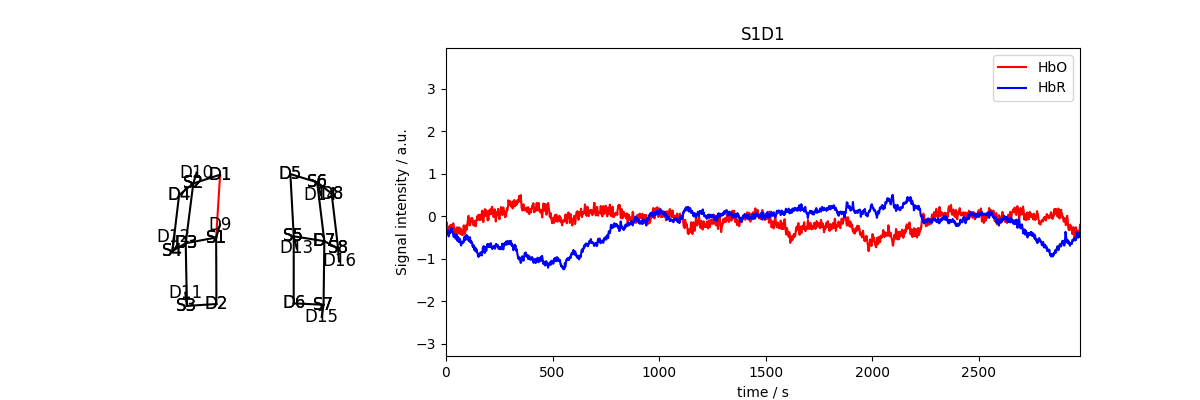

In [9]:
# This is my drawing code that gives a Homer-like GUI interface in the ipynb environment
nirs_show(rec,'conc')

In [10]:
print(rec['stats'].table)

    channel type     cond      beta       tstat      pval      qval     dof
0      S1D1  HbO  HRF 1.0 -0.004374   -0.269052  0.787890  0.893155  2970.0
1      S1D2  HbO  HRF 1.0  0.000397    0.048769  0.961103  0.974930  2970.0
2      S1D3  HbO  HRF 1.0  0.006264    0.736213  0.461601  0.645067  2970.0
3      S1D9  HbO  HRF 1.0  0.014034    0.810083  0.417892  0.600050  2970.0
4      S2D1  HbO  HRF 1.0  0.004981    1.144494  0.252419  0.410914  2970.0
..      ...  ...      ...       ...         ...       ...       ...     ...
275    S7D7  HbR  Drift 0  0.058649   86.495324  0.000000  0.000000  2970.0
276   S7D15  HbR  Drift 0 -0.622822 -470.230810  0.000000  0.000000  2970.0
277    S8D7  HbR  Drift 0  0.003435    4.307101  0.000017  0.000038  2970.0
278    S8D8  HbR  Drift 0  0.740506  831.489720  0.000000  0.000000  2970.0
279   S8D16  HbR  Drift 0 -0.314461 -457.379073  0.000000  0.000000  2970.0

[280 rows x 8 columns]
